# Trabajo Grupal
## Creación de un plásmido tipo pET


In [ ]:
# Intalacion de programas
pip install biopython

In [ ]:
pip install dna_features_viewer

In [ ]:
pip install matplotlib

In [ ]:
# Importar paquetes
from Bio.Seq import Seq

In [ ]:
import os
import sys

from urllib.request import urlretrieve

import Bio
from Bio.SeqUtils import gc_fraction
from Bio.Blast import NCBIWWW

In [ ]:
from Bio.Data import CodonTable


In [ ]:
# Creacion de graficos
from dna_features_viewer import GraphicFeature, GraphicRecord

(<Axes: >,
 ({GF(Promotor1, 90-120 (1)): 0,
   GF(Gen1, 200-550 (1)): 1.0,
   GF(Gen2, 500-874 (-1)): 0,
   GF(Promotor2, 900-920 (-1)): 0},
  {GF(Promotor1, 90-120 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(Promotor2, 900-920 (-1)): {'feature_y': 0, 'annotation_y': 1.0}}))

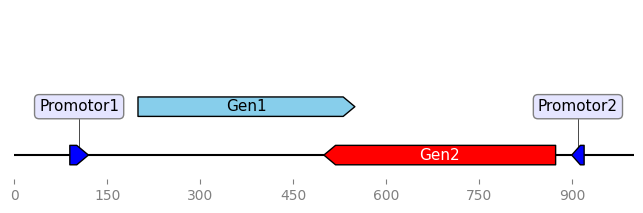

In [ ]:
caracts=[GraphicFeature(start=90, end=120, strand=+1,color="blue", label="Promotor1"),
        GraphicFeature(start=200, end=550, strand=+1,color="skyblue", label="Gen1"),
        GraphicFeature(start=500, end=874, strand=-1,color="red", label="Gen2"),
        GraphicFeature(start=900, end=920, strand=-1,color="blue", label="Promotor2")]

graphic=GraphicRecord(sequence_length=1000, features=caracts)

graphic.plot()

In [ ]:
from dna_features_viewer import CircularGraphicRecord


(<Axes: >,
 ({GF(Promotor1, 90-120 (1)): 0,
   GF(Gen1, 200-550 (1)): 1.0,
   GF(Gen2, 500-874 (-1)): 0,
   GF(Promotor2, 900-920 (-1)): 0},
  {GF(Gen2, 500-874 (-1)): {'feature_y': -1.3884807466313662,
    'annotation_y': 0.7},
   GF(Gen1, 200-550 (1)): {'feature_y': -1.8458582247308335,
    'annotation_y': 0.7},
   GF(Promotor1, 90-120 (1)): {'feature_y': -0.20792338575003289,
    'annotation_y': 0.45},
   GF(Promotor2, 900-920 (-1)): {'feature_y': -0.1573595878395675,
    'annotation_y': 0.45}}))

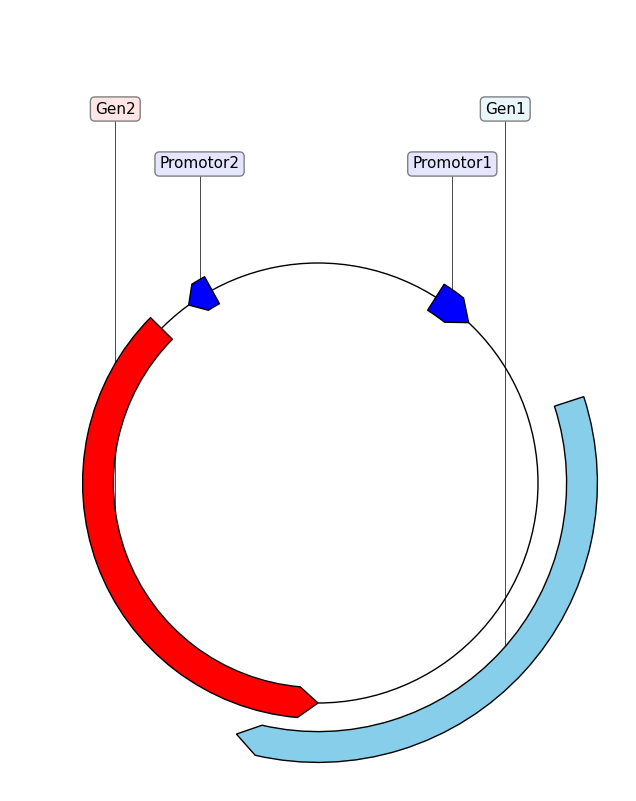

In [ ]:
graphic1=CircularGraphicRecord(sequence_length=1000, features=caracts)
graphic1.plot()

In [ ]:
# Descarga de plasmidos de la base de  datos NCBI
from Bio import SeqIO, SearchIO, Entrez

In [ ]:
#Registro en Entrez

Entrez.email="salmeidam1@est.ups.edu.ec"
file=Entrez.esearch(db="nucleotide",term="cloning vector pET", retmax="30")

record=Entrez.read(file)
print(record)
#Se eligio el iD: 2067515819

{'Count': '33', 'RetMax': '30', 'RetStart': '0', 'IdList': ['2240679116', '2240679114', '2180034252', '2067515819', '2054343255', '1483526165', '1483526161', '1483526157', '1483526153', '1483526149', '1450640880', '1449738827', '1449738697', '1449738693', '1449738524', '1449738069', '1449737651', '1449736529', '1154360387', '1241380514', '1069445879', '2654777', '685505726', '685505723', '685505720', '685505717', '685505714', '685505711', '529177980', '296785221'], 'TranslationSet': [{'From': 'cloning vector', 'To': '"unidentified cloning vector"[Organism] OR cloning vector[All Fields]'}], 'TranslationStack': [{'Term': '"unidentified cloning vector"[Organism]', 'Field': 'Organism', 'Count': '374', 'Explode': 'Y'}, {'Term': 'cloning vector[All Fields]', 'Field': 'All Fields', 'Count': '563673', 'Explode': 'N'}, 'OR', 'GROUP', {'Term': 'pET[All Fields]', 'Field': 'All Fields', 'Count': '462769', 'Explode': 'N'}, 'AND', 'GROUP'], 'QueryTranslation': '("unidentified cloning vector"[Organis

In [ ]:
# Busqueda del código con el identificador

file=Entrez.efetch(db="nucleotide", id="2067515819", rettype="gb", retmode="text")

record=SeqIO.read(file, "genbank")
print(record)

ID: MW718990.1
Name: MW718990
Description: Cloning vector pET-21-VRE_thyA-cat, complete sequence
Number of features: 15
/molecule_type=DNA
/topology=circular
/data_file_division=SYN
/date=20-JUL-2021
/accessions=['MW718990']
/sequence_version=1
/keywords=['']
/source=Cloning vector pET-21-VRE_thyA-cat
/organism=Cloning vector pET-21-VRE_thyA-cat
/taxonomy=['other sequences', 'artificial sequences', 'vectors']
/references=[Reference(title='RecT recombinase expression enables efficient gene editing in Enterococcus', ...), Reference(title='Direct Submission', ...)]
/structured_comment=defaultdict(<class 'dict'>, {'Assembly-Data': {'Sequencing Technology': 'Sanger dideoxy sequencing'}})
Seq('TGGCGAATGGGACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGTGTGGTGGT...GAT')


In [ ]:
#Secuencia completa

print(record.seq)

TGGCGAATGGGACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGTGTGGTGGTTACGCGCAGCGTGACCGCTACACTTGCCAGCGCCCTAGCGCCCGCTCCTTTCGCTTTCTTCCCTTCCTTTCTCGCCACGTTCGCCGGCTTTCCCCGTCAAGCTCTAAATCGGGGGCTCCCTTTAGGGTTCCGATTTAGTGCTTTACGGCACCTCGACCCCAAAAAACTTGATTAGGGTGATGGTTCACGTAGTGGGCCATCGCCCTGATAGACGGTTTTTCGCCCTTTGACGTTGGAGTCCACGTTCTTTAATAGTGGACTCTTGTTCCAAACTGGAACAACACTCAACCCTATCTCGGTCTATTCTTTTGATTTATAAGGGATTTTGCCGATTTCGGCCTATTGGTTAAAAAATGAGCTGATTTAACAAAAATTTAACGCGAATTTTAACAAAATATTAACGTTTACAATTTCAGGTGGCACTTTTCGGGGAAATGTGCGCGGAACCCCTATTTGTTTATTTTTCTAAATACATTCAAATATGTATCCGCTCATGAGACAATAACCCTGATAAATGCTTCAATAATATTGAAAAAGGAAGAGTATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGTTACATCGAACTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGATGAGCACTTTTAAAGTTCTGCTATGTGGCGCGGTATTATCCCGTATTGACGCCGGGCAAGAGCAACTCGGTCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGATGGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAAC

In [ ]:
# Graficos
import matplotlib.pyplot as plt
import numpy as np
from dna_features_viewer import BiopythonTranslator

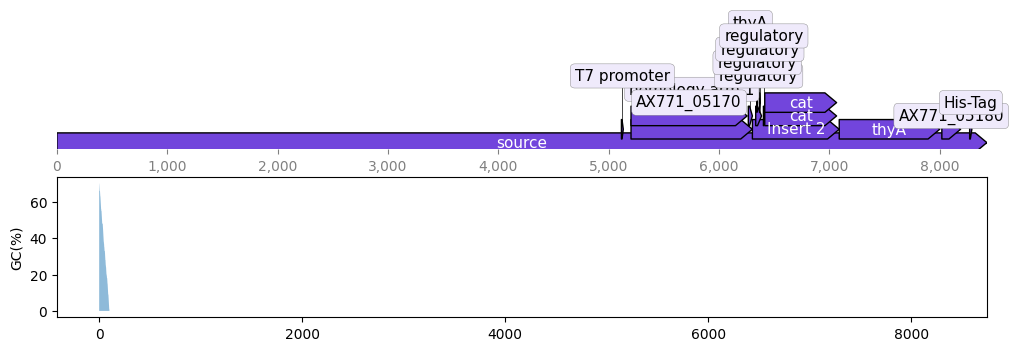

In [ ]:
# Creacion de la figura

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,4))

grafico=BiopythonTranslator().translate_record(record)
grafico.plot(ax=ax1)

y=[]

for i in range (0, len(grafico.sequence)-100):
    count=0
    seq=grafico.sequence[i:1+100]
    for n in seq:
        if n in "GC":
            count += 1

    y.append(count)

x=np.arange(len(grafico.sequence)-100)

ax2.fill_between(x,y,alpha=0.5)
ax2.set_ylabel("GC(%)")

plt.show()